## Observations and Insights

## Dependencies and starter code

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_studyData_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')
combined_studyData_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = combined_studyData_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_studyData_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_studyData_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standardDeviation = combined_studyData_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_studyData_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standardDeviation, 
                          "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

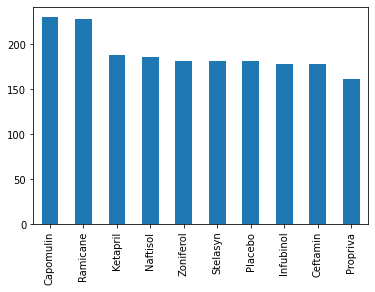

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
counts = combined_studyData_df['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.show()

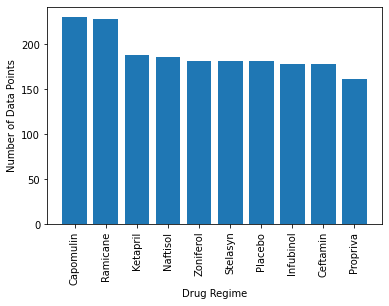

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
counts = combined_studyData_df['Drug Regimen'].value_counts()
plt.bar(counts.index.values, counts.values)
plt.xticks(rotation= 90)
plt.xlabel("Drug Regime")
plt.ylabel("Number of Data Points")
plt.show()

## Pie plots

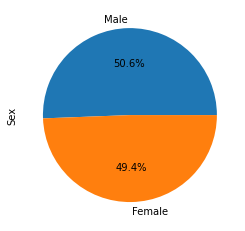

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = combined_studyData_df['Sex'].value_counts()
counts.plot(kind="pie", autopct = '%1.1f%%')
plt.show()

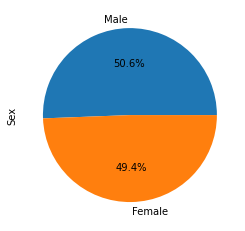

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = combined_studyData_df['Sex'].value_counts()
plt.pie(counts.values, labels = counts.index.values,autopct = '%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_tumor = combined_studyData_df.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = max_tumor.merge(combined_studyData_df, on=['Mouse ID', 'Timepoint'], how='left')
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.


In [8]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin","Ceftamin","Infubinol","Ramicane"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"]==drug, 'Tumor Volume (mm3)']
    # add subset 
    tumor_vol_data_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds


    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound)|(final_tumor_vol > upper_bound)]
    print(f"Drug {drug} outliers: {outliers}")
   

Drug Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Drug Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Drug Infubinol outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Drug Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


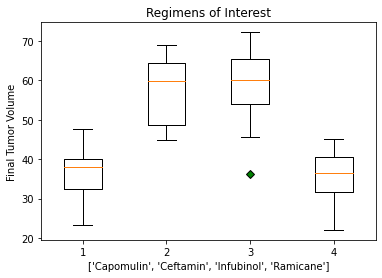

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Regimens of Interest')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(tumor_vol_data_list, flierprops=green_diamond)
plt.xlabel(treatment_list)
plt.show()

## Line and scatter plots

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# create DF with one mouse and confirm data.
mouse_cap_df = combined_studyData_df.loc[combined_studyData_df["Mouse ID"]=="b128"]
mouse_cap_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22


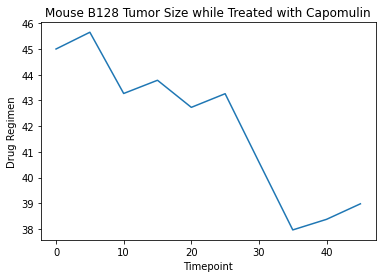

In [42]:
# create x and y labels
plt.title('Mouse B128 Tumor Size while Treated with Capomulin')
plt.xlabel("Timepoint")
plt.ylabel("Drug Regimen")

# generate a line plot
plt.plot(mouse_cap_df['Timepoint'], mouse_cap_df['Tumor Volume (mm3)'])
plt.show()

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
all_cap_df = combined_studyData_df.loc[combined_studyData_df["Drug Regimen"]=="Capomulin"]
all_cap_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


The r-squared is: 0.8419363424694718


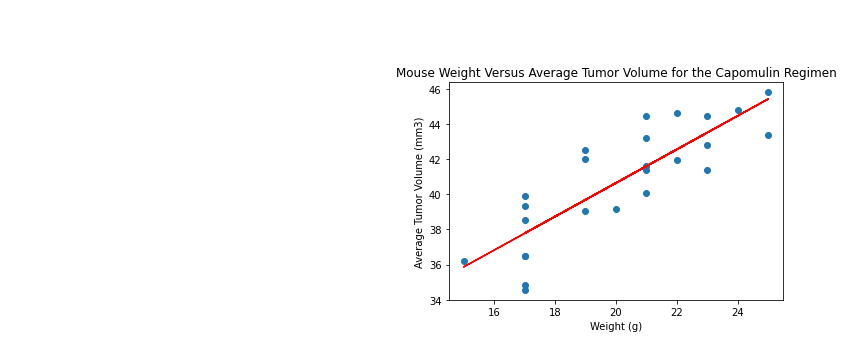

In [51]:

average_tumor_cap_df = all_cap_df.groupby(["Mouse ID"]).mean()
average_tumor_cap_df.head()

x_values = average_tumor_cap_df['Weight (g)']
y_values = average_tumor_cap_df['Tumor Volume (mm3)']

plt.scatter(x_values,y_values)
plt.title('Mouse Weight Versus Average Tumor Volume for the Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

print(f"The r-squared is: {rvalue}")
plt.show()

In [54]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
ave_weight = average_tumor_cap_df['Weight (g)']
tvolume = average_tumor_cap_df['Tumor Volume (mm3)']
correlation = st.pearsonr(ave_weight, tvolume)
print(f"The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)} ")


The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is 0.84 


# # Three things of note from this study. 
1. The tumor volume per mouse decreased drastically during the third timepoint while on the Capomulin Regimen.
2. Capomulin and Ramacane appear the most promising drug regimens, however Infubinol has an interesting outlier for tumor reduction.
3. Ceftamin appears to have the widest range on final tumor volume. 